# Customer Classification Dashboard Visualization Using Unsupervised Machine Learning

## Overview

1. Problem formulation - What are we trying to solve?
2. Explaining how the whole automated process will work (Github -> Python -> SQL -> Power BI)
3. Loading the Raw Data into Python


4. Cleaning the Raw Data
5. Running Kmeans
6. Running PCA
7. Ways to improve results
8. Running Kmeans with optimal parameters


9. Creating the front end PowerBI Dashboard
10. Creating Insights from Clusters


11. Creating NPS analytics per Cluster
12. Discussing how these results can be valuable to the company's growth strategy



What is the ML process video here: https://youtu.be/vfA1ZKN4Y40

## 2. What is Unsupervised Learning

-	Is when you only have input data (X) without a corresponding target variable (y) to predict
- .
-	The aim is to model the underlying structure of the data in order to learn from data and identify groups of data (segments / clusters) with similar characteristics / behaviours


## 4. Explaining how the whole automated process will work (Excel -> SQL -> Python -> SQL -> Power BI)

### Importing / Installing packages

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

## 5. Loading the Raw Data into Python

In [3]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################

# Loading the data
raw_data = pd.read_csv('https://raw.githubusercontent.com/itsafo/Customers-Classification-Visualization/main/CustomersRawData.csv')

#runs the first 5 rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [4]:
# #################################################################################################################
# ##############################   Getting the file from SQL Server      ##########################################
# #################################################################################################################

# import pypyodbc as podbc

# conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
#                      "Server=DESKTOP-8L98FK0\MSSQLSERVER08;"
#                      "Database=Data360YP;"
#                      "Trusted_Connection=yes;")

# # rynning the SQL quey i need
# SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data2]''', conn2)

# #conn.close()



# # Viz
# SQL_Query.head()

## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning


In [5]:
# print the shape
print(raw_data.shape)

# Checking for null values
raw_data.isnull().sum()

(14783, 19)


CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [14]:
# Visualize the NULL observations

nan_df = raw_data[raw_data.isna().any(axis=1)]
display(nan_df.head())
print(nan_df.shape)

# Dropping all null data
clean_data = raw_data.dropna(subset = ['Total_Household_Income'])

# Validating all null has been dropped
print(clean_data.shape)
clean_data.isnull().sum()
nan_df1 = clean_data[clean_data.isna().any(axis=1)]
display(nan_df1.head())
print(nan_df1.shape)

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(14778, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?


In [16]:
customers_data = clean_data

In [17]:
# Investigating the elements quantity whithin each Feature 

for column in customers_data:
    unique_vals = np.unique(customers_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year? :

In [18]:
# Getting the columns we need

customers_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

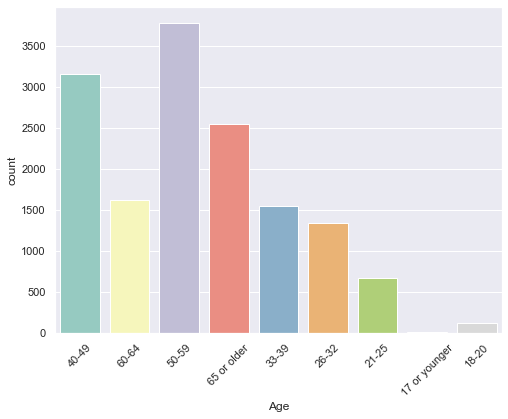

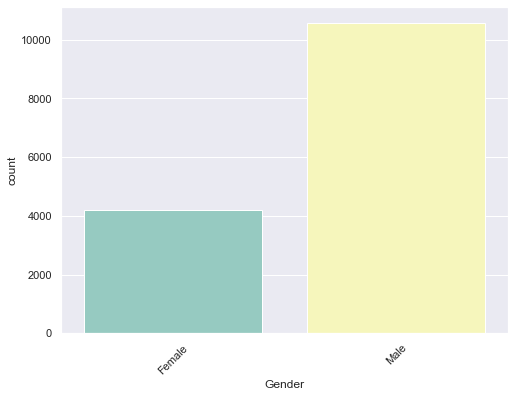

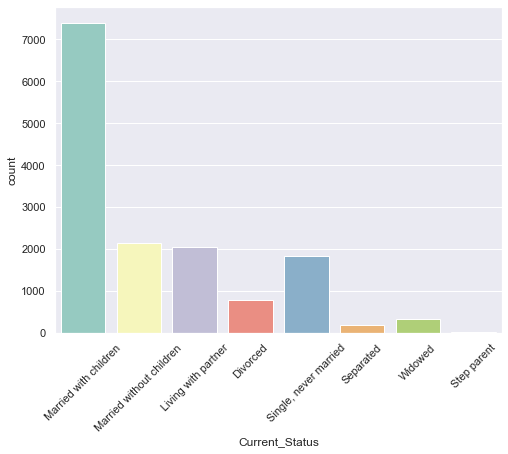

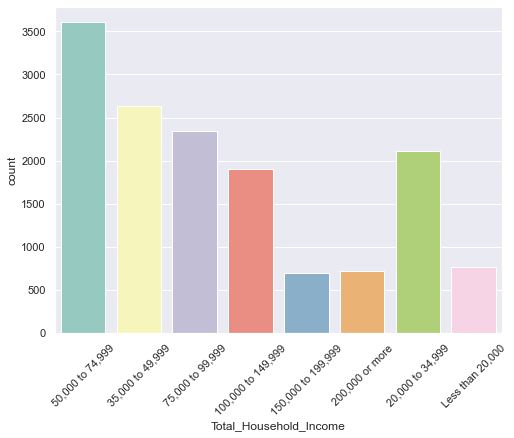

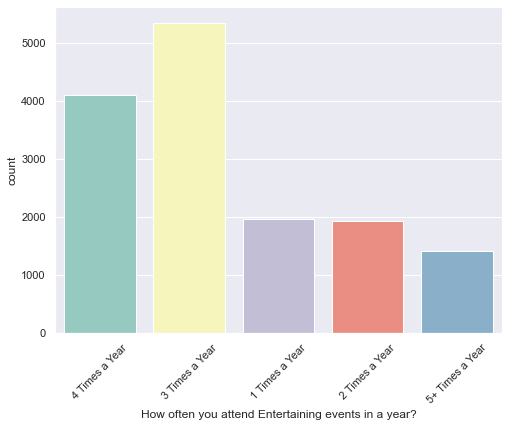

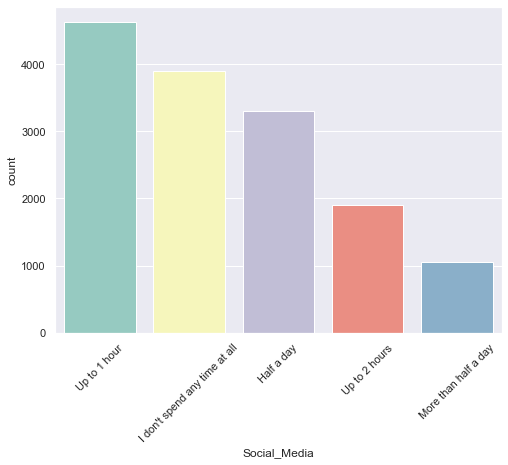

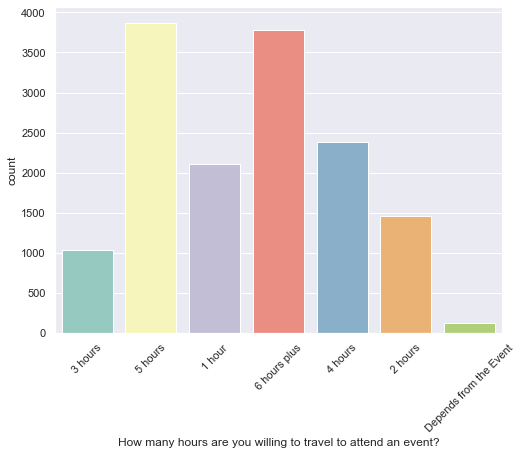

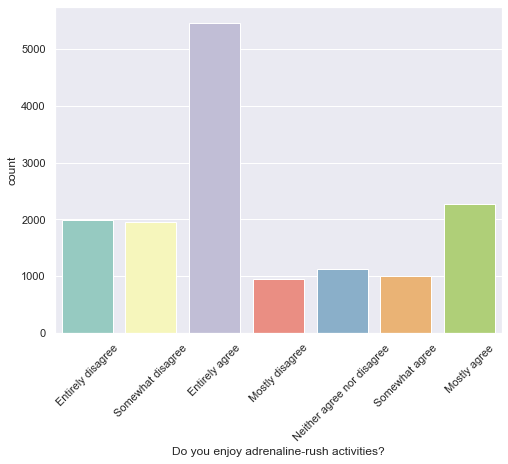

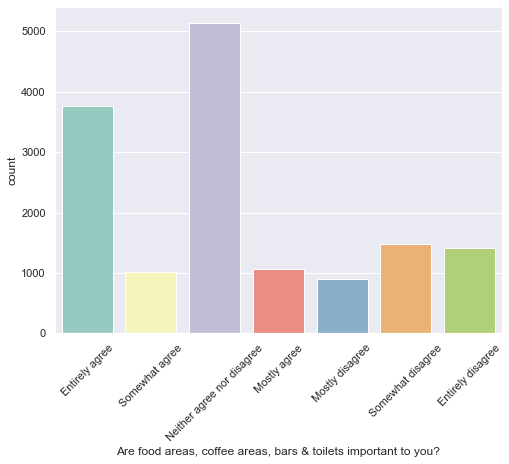

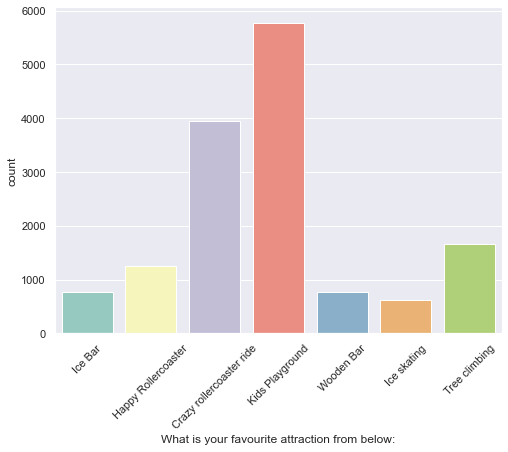

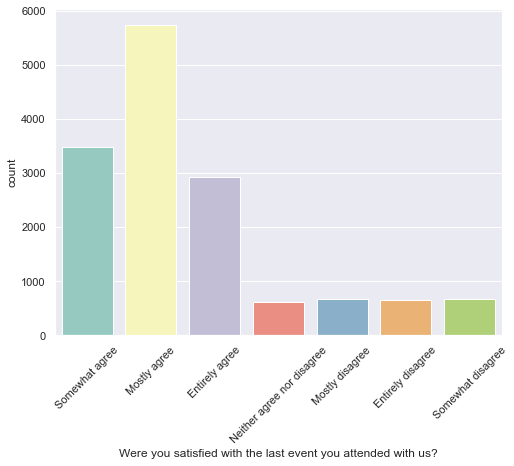

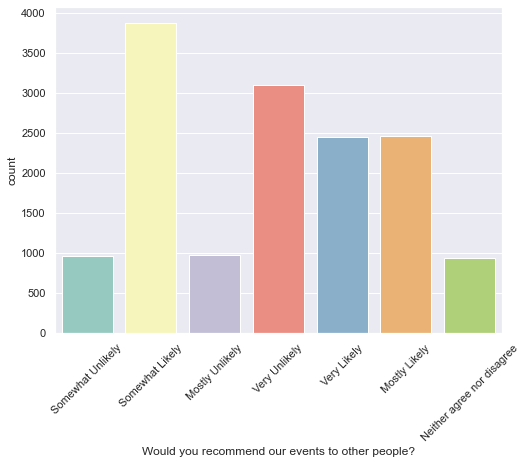

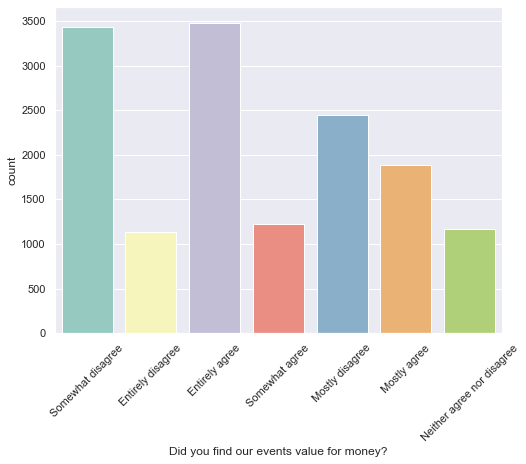

In [20]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender', 
       'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:','Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = customers_data, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


### 5.2 Feature Engineering - Creating a distance metric

In [21]:
# Creating a distance function - took this ready from the web

 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [24]:
# Creating lat and long for our event - randoms

# customers_data['Event Lat'] = '51.5073'
# customers_data['Event Lon'] = '0.1657'


# haversine_vectorize(customers_data['Event Lon'].astype(float) ,customers_data['Event Lat'].astype(float),customers_data['longitude'].astype(float) ,
#                    customers_data['latitude'].astype(float))


# customers_data['Distance from Event'] = haversine_vectorize(customers_data['Event Lon'].astype(float) ,customers_data['Event Lat'].astype(float),customers_data['longitude'].astype(float) ,
#                    customers_data['latitude'].astype(float))

### 5.3 Feature Engineering - Numeric Representation

In [26]:
# Making categorical variables into numeric representation

# print(SQL_Query.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
needed_data = customers_data[features]
print(needed_data.shape)

# Making categorical variables into numeric representation
numeric_data = pd.get_dummies(needed_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(numeric_data.shape)
# print the shape

numeric_data.head()



(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,Gender_Male,Current_Status_Divorced,Current_Status_Living with partner,Current_Status_Married with children,Current_Status_Married without children,Current_Status_Separated,"Current_Status_Single, never married",Current_Status_Step parent,Current_Status_Widowed,"Total_Household_Income_100,000 to 149,999","Total_Household_Income_150,000 to 199,999","Total_Household_Income_20,000 to 34,999","Total_Household_Income_200,000 or more","Total_Household_Income_35,000 to 49,999","Total_Household_Income_50,000 to 74,999","Total_Household_Income_75,000 to 99,999","Total_Household_Income_Less than 20,000",How often you attend Entertaining events in a year?_1 Times a Year,How often you attend Entertaining events in a year?_2 Times a Year,How often you attend Entertaining events in a year?_3 Times a Year,How often you attend Entertaining events in a year?_4 Times a Year,How often you attend Entertaining events in a year?_5+ Times a Year,Social_Media_Half a day,Social_Media_I don't spend any time at all,Social_Media_More than half a day,Social_Media_Up to 1 hour,Social_Media_Up to 2 hours,How many hours are you willing to travel to attend an event?_1 hour,How many hours are you willing to travel to attend an event?_2 hours,How many hours are you willing to travel to attend an event?_3 hours,...,Do you enjoy adrenaline-rush activities?_Mostly agree,Do you enjoy adrenaline-rush activities?_Mostly disagree,Do you enjoy adrenaline-rush activities?_Neither agree nor disagree,Do you enjoy adrenaline-rush activities?_Somewhat agree,Do you enjoy adrenaline-rush activities?_Somewhat disagree,"Are food areas, coffee areas, bars & toilets important to you?_Entirely agree","Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree","Are food areas, coffee areas, bars & toilets important to you?_Mostly agree","Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree","Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree","Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree",What is your favourite attraction from below:_Crazy rollercoaster ride,What is your favourite attraction from below:_Happy Rollercoaster,What is your favourite attraction from below:_Ice Bar,What is your favourite attraction from below:_Ice skating,What is your favourite attraction from below:_Kids Playground,What is your favourite attraction from below:_Tree climbing,What is your favourite attraction from below:_Wooden Bar,Were you satisfied with the last event you attended with us?_Entirely agree,Were you satisfied with the last event you attended with us?_Entirely disagree,Were you satisfied with the last event you attended with us?_Mostly agree,Were you satisfied with the last event you attended with us?_Mostly disagree,Were you satisfied with the last event you attended with us?_Neither agree nor disagree,Were you satisfied with the last event you attended with us?_Somewhat agree,Were you satisfied with the last event you attended with us?_Somewhat disagree,Would you recommend our events to other people?_Mostly Likely,Would you recommend our events to other people?_Mostly Unlikely,Would you recommend our events to other people?_Neither agree nor disagree,Would you recommend our events to other people?_Somewhat Likely,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agre

In [27]:
needed_data.head()

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 6.0 K-means Clustering

In [24]:
# More details in how K-means works here: https://youtu.be/4b5d3muPQmA

In [28]:
# Running Kmeans

X_train = numeric_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.26594116453


In [29]:
kmeans.labels_.shape

(14778,)

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [34]:
# Getting the Inertia

# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for n in no_of_clusters:
    kmeans = KMeans(n_clusters=n, random_state=2)
    kmeans = kmeans.fit(X_train)
    inertia_value = kmeans.inertia_
    inertia_value = round(inertia_value)
    inertia.append(inertia_value)
    print("The innertia for :", n, "Clusters is:", inertia_value)




The innertia for : 2 Clusters is: 125619
The innertia for : 3 Clusters is: 114905
The innertia for : 4 Clusters is: 106337
The innertia for : 5 Clusters is: 100865
The innertia for : 6 Clusters is: 96433
The innertia for : 7 Clusters is: 93814
The innertia for : 8 Clusters is: 91697
The innertia for : 9 Clusters is: 89725
The innertia for : 10 Clusters is: 88493
The innertia for : 11 Clusters is: 87581
The innertia for : 12 Clusters is: 86618
The innertia for : 13 Clusters is: 85829
The innertia for : 14 Clusters is: 85015
The innertia for : 15 Clusters is: 84435
The innertia for : 16 Clusters is: 83663
The innertia for : 17 Clusters is: 82854
The innertia for : 18 Clusters is: 82486
The innertia for : 19 Clusters is: 82188


Text(0.5, 1.0, 'Inertia Plot per k')

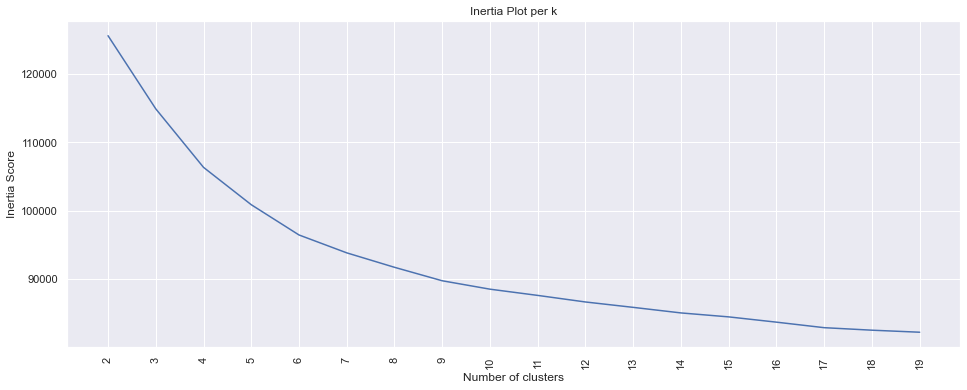

In [35]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

# Selecting 5 clusters as optimum

In [44]:
# Creating the data frame for 5 clusters
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


display(kmeans.labels_)

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
class_df = pd.DataFrame(counts, columns = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"])

# display
class_df

array([2, 2, 2, ..., 2, 0, 2])

,Class 1,Class 2,Class 3,Class 4,Class 5
0,2208,1226,8492,1865,987


In [38]:
display(kmeans.labels_)
display(predictions)
numeric_data.shape

array([2, 2, 2, ..., 2, 0, 2])

array([2, 2, 2, ..., 2, 0, 2])

(14778, 86)

## 7.0 Running Principal Component Analysis (PCA) to Visualize & improve results

In [36]:
# Additional resources:
# kmeans SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# PCA SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# PCA - How it works: https://youtu.be/FgakZw6K1QQ 
# How to compute PCA: https://youtu.be/fKivxsVlycs

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

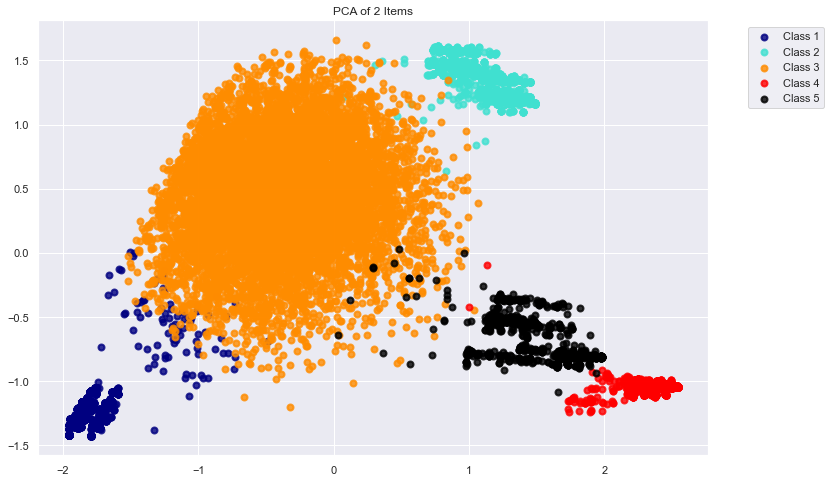

In [39]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [38]:
# Additional resources:
# kmeans SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# PCA SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# PCA - How it works: https://youtu.be/FgakZw6K1QQ 
# How to compute PCA: https://youtu.be/fKivxsVlycs

### 7.1. Identifying the "best" number of components

Total Variance in our dataset is:  9.789277508428572
The 95% variance we want to have is:  9.299813633007144

Variance explain with 30 n_compononets:  7.800063287617342
Variance explain with 35 n_compononets:  8.200059944222119
Variance explain with 40 n_compononets:  8.559358189926284
Variance explain with 41 n_compononets:  8.62520607241615
Variance explain with 50 n_compononets:  9.157222065601195
Variance explain with 53 n_compononets:  9.301801997586796
Variance explain with 55 n_compononets:  9.391528190593435
Variance explain with 60 n_compononets:  9.592274980903568


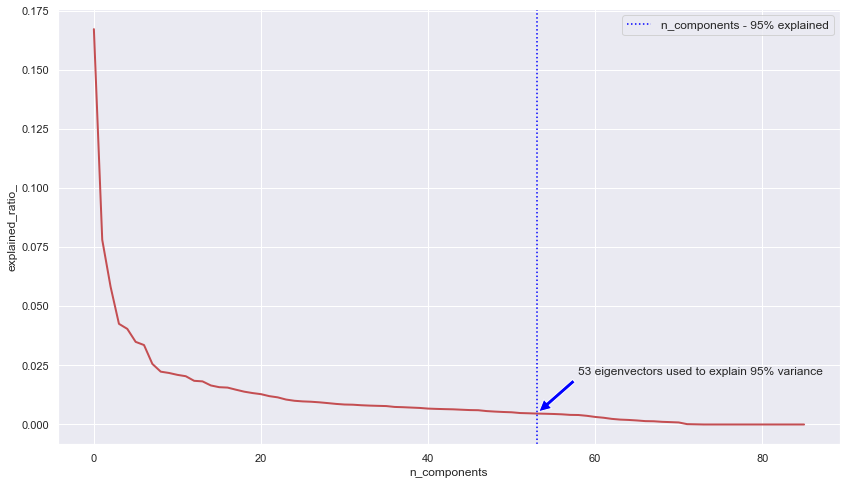

In [40]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()




The innertia for : 2 Clusters is: 118418.00533440094
The innertia for : 3 Clusters is: 107706.73804798895
The innertia for : 4 Clusters is: 99150.89658689604
The innertia for : 5 Clusters is: 94717.71454592902
The innertia for : 6 Clusters is: 89259.98846975282
The innertia for : 7 Clusters is: 87032.31815907714
The innertia for : 8 Clusters is: 84734.2526517544
The innertia for : 9 Clusters is: 82901.43389425897
The innertia for : 10 Clusters is: 81675.79302907936
The innertia for : 11 Clusters is: 80363.07116110664
The innertia for : 12 Clusters is: 79645.57849749699
The innertia for : 13 Clusters is: 78836.55417592287
The innertia for : 14 Clusters is: 77765.06416907474
The innertia for : 15 Clusters is: 77471.39025517231
The innertia for : 16 Clusters is: 76646.9373076294
The innertia for : 17 Clusters is: 75782.7240216458
The innertia for : 18 Clusters is: 75256.95483848441
The innertia for : 19 Clusters is: 74707.75842734567


Text(0.5, 1.0, 'Inertia Plot per k')

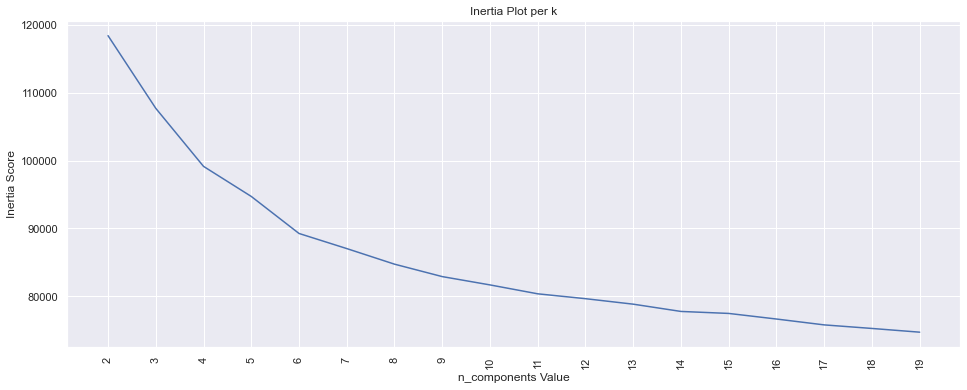

In [41]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We managed to improve our results by reducing inertia


## "Improving" results by Cleaning/Combining Variables

In [42]:
# Visualizing all of your variables / columns
numeric_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [52]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", numeric_data.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column


numeric_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
numeric_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(numeric_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (numeric_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

# 4-5 times
numeric_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
numeric_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(numeric_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (numeric_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

print("The shape is: ", numeric_data.shape)


# Cleaning the "social_media" column

# half a day + more than half a day
numeric_data['social_media_Half a day plus'] = 0
numeric_data['social_media_Half a day plus'][(numeric_data['Social_Media_Half a day'] == 1) | (numeric_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", numeric_data.shape)


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(numeric_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (numeric_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(numeric_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (numeric_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
numeric_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(numeric_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (numeric_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", numeric_data.shape)


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
numeric_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
numeric_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(numeric_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (numeric_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
numeric_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
numeric_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(numeric_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (numeric_data['Do you enjoy adrenaline-rush activities?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", numeric_data.shape)





The shape is:  (14778, 94)
The shape is:  (14778, 94)
The shape is:  (14778, 94)
The shape is:  (14778, 94)
The shape is:  (14778, 94)


<ipython-input-52-1faebf0288da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(numeric_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (numeric_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1
<ipython-input-52-1faebf0288da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(numeric_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (numeric_data['How 

In [53]:
numeric_data.iloc[:, 86:]

,how_often_you_attend_entertaining_events_in_a_year_1_or_2_times,how_often_you_attend_entertaining_events_in_a_year_4_or_5_times,social_media_Half a day plus,how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree
0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,1,0,1
3,1,0,1,1,0,0,0,0
4,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
14778,0,0,0,0,1,0,0,1
14779,0,1,0,0,1,0,0,0
14780,0,1,0,0,1,0,1,0
14781,0,0,0,0,1,0,0,1


In [58]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | (numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", numeric_data.shape)



# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
numeric_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
numeric_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(numeric_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (numeric_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (numeric_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | (numeric_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", numeric_data.shape)


# Cleaning the "would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
numeric_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
numeric_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(numeric_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (numeric_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | (numeric_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", numeric_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
numeric_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
numeric_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(numeric_data['Did you find our events value for money?_Somewhat agree'] == 1) | (numeric_data['Did you find our events value for money?_Mostly agree'] == 1)] = 1

print("The shape is: ", numeric_data.shape)

The shape is:  (14778, 98)
The shape is:  (14778, 98)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


<ipython-input-58-f882de905053>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (numeric_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1
<ipython-input-58-f882de905053>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(numeric_data['Are food areas, coffee areas,

In [59]:
numeric_data.iloc[:, 94:]

,are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree,are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree,were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree,would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely,did_you_find_our_events_value_for_money Mostly & Somewhat agree
0,0,0,0,1,0
1,0,0,0,0,0
2,1,0,0,1,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
14778,0,0,0,0,0
14779,0,1,0,0,1
14780,0,1,0,0,0
14781,0,0,0,0,0


In [67]:
# Replacing apostrophe from columns names
numeric_data.columns = numeric_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       #'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_2 Times a Year',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_4 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year',
                
       #'social_media_Half a day', 
       "Social_Media_I dont spend any time at all",
       #'social_media_More than half a day', 
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
                
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
                
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
                
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',
                
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree',
                
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
                
       'Were you satisfied with the last event you attended with us?_Entirely agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree',
                
       'Would you recommend our events to other people?_Mostly Likely',
       #'would_you_recommend_our_events_to_other_people_Mostly Unlikely',
       #'would_you_recommend_our_events_to_other_people_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
       #'would_you_recommend_our_events_to_other_people_Somewhat Unlikely',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Very Unlikely',
                
       'Did you find our events value for money?_Entirely agree',
       'Did you find our events value for money?_Entirely disagree',
       #'did_you_find_our_events_value_for_money_Mostly agree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       #'did_you_find_our_events_value_for_money_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',
                
       'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
                
       'social_media_Half a day plus',
                
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
                
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
                
       'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
                
       'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
                
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
                
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

The innertia for : 2 Clusters is: 115919.78308673254
The innertia for : 3 Clusters is: 103587.27451723187
The innertia for : 4 Clusters is: 96342.07475328038
The innertia for : 5 Clusters is: 91346.36112956647
The innertia for : 6 Clusters is: 88976.31428040098
The innertia for : 7 Clusters is: 86892.48603824218
The innertia for : 8 Clusters is: 85000.53669610909
The innertia for : 9 Clusters is: 83529.35128331836
The innertia for : 10 Clusters is: 82003.2930681899
The innertia for : 11 Clusters is: 80902.3450231359
The innertia for : 12 Clusters is: 80030.04786055001
The innertia for : 13 Clusters is: 78928.15729512615
The innertia for : 14 Clusters is: 78022.9635231541
The innertia for : 15 Clusters is: 77320.90765428478
The innertia for : 16 Clusters is: 77055.4575998475
The innertia for : 17 Clusters is: 75898.17738594653
The innertia for : 18 Clusters is: 75571.17238645109
The innertia for : 19 Clusters is: 74774.46184823127
The innertia for : 20 Clusters is: 74143.77277102946


Text(0.5, 1.0, 'Inertia Plot per k')

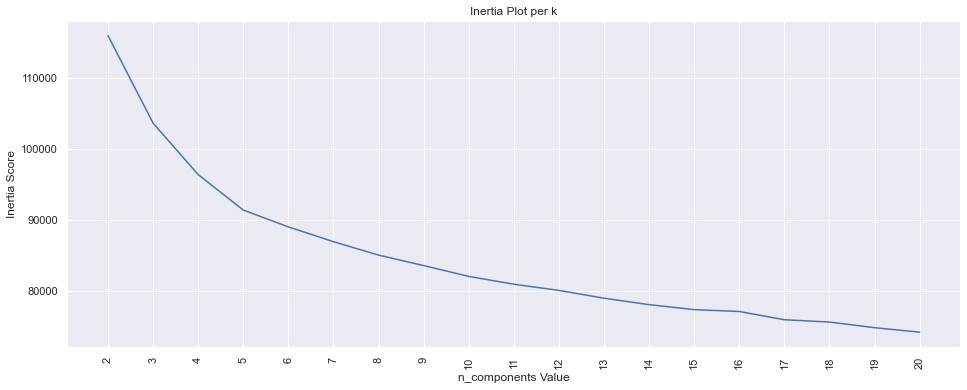

In [68]:
# Re - Running Kmeans on "new" data

X_train = numeric_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion:
- The intertia improved vs the initial run before PCA and Vs the PCA run - Now we want to apply both

### 8.1. Running PCA on New Dataset after grouping

Explained variance ratio (first two components): [0.192767 0.096030]


<Figure size 576x432 with 0 Axes>

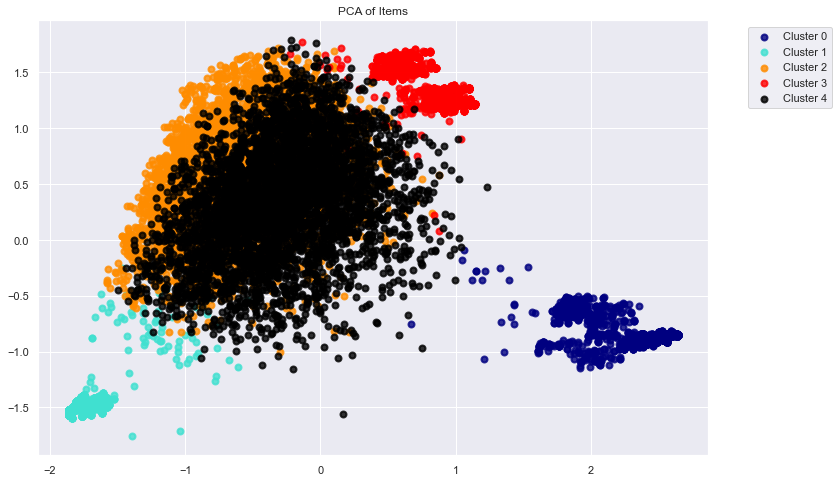

In [69]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.322886930766542
The 95% variance we want to have is:  8.856742584228215

Variance explain with 30 n_compononets:  8.17407311121065
Variance explain with 35 n_compononets:  8.558137719474265
Variance explain with 36 n_compononets:  8.6232779790702
Variance explain with 40 n_compononets:  8.86339682285
Variance explain with 41 n_compononets:  8.91438719262266
Variance explain with 50 n_compononets:  9.26857425202093


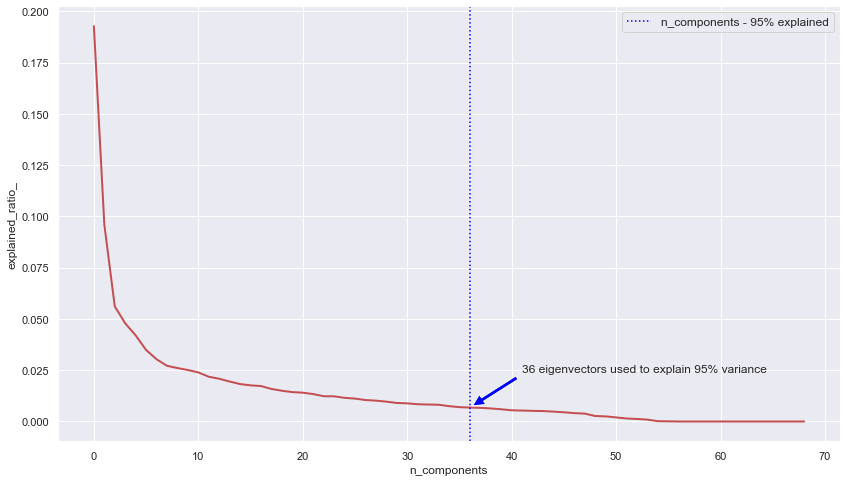

In [70]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 105582.24894248798
The innertia for : 3 Clusters is: 93254.94559906109
The innertia for : 4 Clusters is: 86034.6181098944
The innertia for : 5 Clusters is: 81054.24433482194
The innertia for : 6 Clusters is: 78704.9570431409
The innertia for : 7 Clusters is: 76622.05115886252
The innertia for : 8 Clusters is: 74734.76708175693
The innertia for : 9 Clusters is: 73724.35325959846
The innertia for : 10 Clusters is: 71905.86497879459
The innertia for : 11 Clusters is: 70795.7857796758
The innertia for : 12 Clusters is: 69653.68523197336
The innertia for : 13 Clusters is: 68738.02875535419
The innertia for : 14 Clusters is: 68198.46416112337
The innertia for : 15 Clusters is: 67436.66583219144
The innertia for : 16 Clusters is: 66454.7394373924
The innertia for : 17 Clusters is: 65927.00611881379
The innertia for : 18 Clusters is: 65090.033244958264
The innertia for : 19 Clusters is: 64686.57581329271
The innertia for : 20 Clusters is: 63930.95052357189


Text(0.5, 1.0, 'Inertia Plot per k')

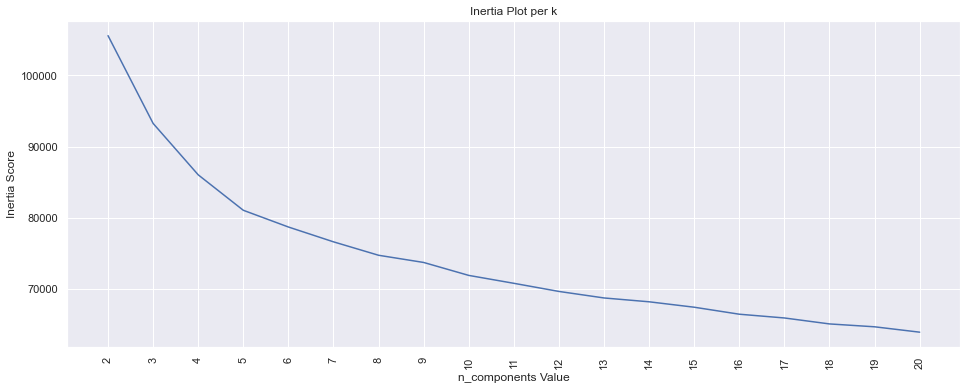

In [71]:
# Running PCA again

pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We managed to improve our results further more; from 91318 to 80676 with 5 clusters


## 9. Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [74]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
customers_data['Clusters'] = clusters

# Creating a cluster Category
customers_data['Class'] = 'No Data'
customers_data['Class'].loc[customers_data['Clusters'] == 0] = 'Class 1'
customers_data['Class'].loc[customers_data['Clusters'] == 1] = 'Class 2'
customers_data['Class'].loc[customers_data['Clusters'] == 2] = 'Class 3'
customers_data['Class'].loc[customers_data['Clusters'] == 3] = 'Class 4'
customers_data['Class'].loc[customers_data['Clusters'] == 4] = 'Class 5'

customers_data.head(5)

<ipython-input-74-ad6e6ed8cb63>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_data['Clusters'] = clusters
<ipython-input-74-ad6e6ed8cb63>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_data['Class'] = 'No Data'
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category,Class
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,3,Cluster 4,Class 4
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,0,Cluster 1,Class 1
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,0,Cluster 1,Class 1
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2,Class 2
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,2,Cluster 3,Class 3


In [75]:
#SQL_Query['do_you_enjoy_adrenaline_rush_activities'].unique()

customers_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category', 'Class'],
      dtype='object')

In [77]:
# Creating an order for Household Income

customers_data['Household Income Order'] = 0
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == 'Less than 20,000'] = 1
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '20,000 to 34,999'] = 2
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '35,000 to 49,999'] = 3
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '50,000 to 74,999'] = 4
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '75,000 to 99,999'] = 5
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '100,000 to 149,999'] = 6
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '150,000 to 199,999'] = 7
customers_data['Household Income Order'].loc[customers_data['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
customers_data['Social_Media'] = customers_data['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
customers_data['Social Media Time Spend Order'] = 0
customers_data['Social Media Time Spend Order'].loc[customers_data['Social_Media'] == 'I dont spend any time at all'] = 1
customers_data['Social Media Time Spend Order'].loc[customers_data['Social_Media'] == 'Up to 1 hour'] = 2
customers_data['Social Media Time Spend Order'].loc[customers_data['Social_Media'] == 'Up to 2 hours'] = 3
customers_data['Social Media Time Spend Order'].loc[customers_data['Social_Media'] == 'Half a day'] = 4
customers_data['Social Media Time Spend Order'].loc[customers_data['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
customers_data['food_areas_coffee_areas_bars_toilets Agree Order'].loc[customers_data['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7

# Creating an order for Do you enjoy adrenaline-rush activities?
customers_data['enjoy_adrenaline_rush_activities Agree Order'] = 0
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
customers_data['enjoy_adrenaline_rush_activities Agree Order'].loc[customers_data['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

# Creating an order for Were you satisfied with the last event you attended with us?
customers_data['Satisfied Agree Order'] = 0
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
customers_data['Satisfied Agree Order'].loc[customers_data['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

# Creating an order for Did you find our events value for money?
customers_data['Value_for_money Agree Order'] = 0
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Entirely agree'] = 1
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Mostly agree'] = 2
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Somewhat agree'] = 3
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Mostly disagree'] = 6
customers_data['Value_for_money Agree Order'].loc[customers_data['Did you find our events value for money?'] == 'Entirely disagree'] = 7


# Creating an order for Would you recommend our events to other people?
customers_data['Recommend Order'] = 0
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Very Likely'] = 1
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
customers_data['Recommend Order'].loc[customers_data['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7




<ipython-input-77-c2c8420cfc44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_data['Household Income Order'] = 0
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [79]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=AFOLABI-D-III\SQLEXPRESS;"
                     "Database=customerSurvey;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

customers_data.to_sql('Classification_Output', schema='dbo', con = engine, if_exists = 'replace')


In [53]:
# Exporting the data in a CSV

customers_data.to_csv('Events_Cluster_Output', sep='\t')

In [80]:

customers_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category,Class,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,3,Cluster 4,Class 4,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,0,Cluster 1,Class 1,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I dont spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,0,Cluster 1,Class 1,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2,Class 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,2,Cluster 3,Class 3,6,2,4,6,1,1,7


In [81]:
os. getcwd() 

'C:\\Users\\user\\Downloads\\Python-Tutorials-master\\Python-Tutorials-master\\Unsupervised Learning'